# Correlation of Crime Rate Throughout the Year Correlating to Major Shopping Holidays

### Summary of Questions for analysis:
1. Is there an increase in crime during major shopping holidays? 
2. Do cities with the least amount of crime experience an increase in crime that is more than noticeable during major shopping holidays? 
3. Which crimes are most prevalent during major shopping holidays? 
4. Are there specific cities more prone to an increase in crime during major shopping holidays?

### Definition of shopping holidays:

In [50]:
holiday_df = pd.read_csv("retail_holidays.csv")

holiday_df

,Retail Holidays,2015 Year,2016 Year,2017 Year,2018 Year
0,New Years Day,1/1/2015,1/1/2016,1/1/2017,1/1/2018
1,Martin Luther King Day,1/19/2015,1/18/2016,1/16/2017,1/15/2018
2,Super Bowl,2/1/2015,2/7/2016,2/5/2017,2/4/2018
3,Valentine's Day,2/14/2015,2/14/2016,2/14/2017,2/14/2018
4,Easter,4/5/2015,3/27/2016,4/16/2017,4/1/2018
5,Earth Day,4/22/2015,4/22/2016,4/22/2017,4/22/2018
6,Mother's Day,5/10/2015,5/8/2016,5/14/2017,5/13/2018
7,Memorial Day,5/25/2015,5/30/2016,5/29/2017,5/28/2018
8,Father's Day,6/21/2015,6/19/2016,6/18/2017,6/17/2018
9,Independence Day,7/4/2015,7/4/2016,7/4/2017,7/4/2018


#  Question 1

*Is there an increase in crime during major shopping holidays?*

In [51]:
# Dependencies and setup
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy import stats

## Q1. Data Cleansing

Crime report data from 2016 for three US cities, Austin, Los Angeles, and Chicago was selected to run the study. Cleansing was done in a previous step. This grouped the data by a common list of crime types and counted the number of each crime type reported each day.

In this step, a list of major shopping holiday dates is used to divide the data. A standardized timestamp column is also added.

In [52]:
# Read in the data
cities_2016_df = pd.read_csv('cities_by_date_2016.csv')
cities_2016_df.dropna(inplace=True, axis=1)

# Add a column which tells us if it's a holiday
holidays_df = pd.read_csv('retail_holidays.csv')
def check_if_holiday(d):
    result = False
    for h in holidays_df['2016 Year']:
        if d == h: result = True
    
    return result

cities_2016_df['Is_Holiday'] = cities_2016_df['Date'].apply(check_if_holiday)
cities_2016_df['Is_Holiday_int'] = cities_2016_df['Date'].apply(lambda h: int(check_if_holiday(h)))

# Add a timestamp column
cities_2016_df['timestamp'] = cities_2016_df['Date'].apply(lambda ts: datetime.datetime.strptime(ts, '%m/%d/%Y'))

column_names = list(cities_2016_df)
cities = ['Austin', 'Chicago', 'LA']

# Add a total crime column for each city
for c in cities:
    total_column_name = 'Total_Crimes_' + c
    cities_2016_df[total_column_name] = 0
    for col in column_names:
        if c in col:
            cities_2016_df[total_column_name] = cities_2016_df[total_column_name] + cities_2016_df[col]

# Separate into two data frames. Also, drop the last row.
cities_2016_holidays_df = cities_2016_df[(cities_2016_df.Is_Holiday_int > 0)]
cities_2016_non_holidays_df = cities_2016_df[(cities_2016_df.Is_Holiday_int < 1) &
                                            (cities_2016_df.Total_Crimes_LA < 200000)]

## Q1. Statistical Tests

A student's T test was run comparing the number of crimes committed per day on holidays vs. non-holidays for the three US cities. This showed no statistically significant difference in crime for Austin and Los Angeles. P-scores were 56.7% and 37.1% respectively.

Chicago was found to have a small (4.43%) *decrease* in crime on holidays on average, with a P-score of 3.84%.

In [53]:
aust_hol = cities_2016_holidays_df['Total_Crimes_Austin']
aust_non = cities_2016_non_holidays_df['Total_Crimes_Austin']

t2, p2 = stats.ttest_ind(aust_hol, aust_non)
print("T Austin = " + str(t2))
print("T Austin = " + str(p2))

LA_hol = cities_2016_holidays_df['Total_Crimes_LA']
LA_non = cities_2016_non_holidays_df['Total_Crimes_LA']

t2, p2 = stats.ttest_ind(LA_hol, LA_non)
print("T LA = " + str(t2))
print("P LA = " + str(p2))

chi_hol = cities_2016_holidays_df['Total_Crimes_Chicago']
chi_non = cities_2016_non_holidays_df['Total_Crimes_Chicago']

t_chi, p_chi = stats.ttest_ind(chi_hol, chi_non)
print(f"T Chicago: {t_chi}")
print(f"P Chicago: {p_chi}")

avg_diff_chi = stats.tmean(chi_hol) - stats.tmean(chi_non)
pct_diff_chi = 100 * avg_diff_chi * 2 / (stats.tmean(chi_hol) + stats.tmean(chi_non))

print(f"Chicago average crime difference: {avg_diff_chi}")
print(f"Chicago average crime % difference: {pct_diff_chi} %")

T Austin = -0.5736545463690724
T Austin = 0.5665558530152603
T LA = 0.8958879334012444
P LA = 0.3709046912766367
T Chicago: -2.078106931167499
P Chicago: 0.038399807996862274
Chicago average crime difference: -23.788866980130365
Chicago average crime % difference: -4.430393334410504 %


## Q1. Visualizations

The histograms below show the divided data distributions for all three cities. The difference between holiday and non-holiday crime counts can be seen on the Chicago figure. Since there are so few holidays, their histograms are difficult to discern. Plotting these again on a log scale helps to visualize the smaller data distributions.

The time series figure below provides another way to visualize Chicago crime in 2016. Data is quite noisy. There also appears to be a seasonal effect on crime, with an increase in the summer.

<IPython.core.display.Javascript object>


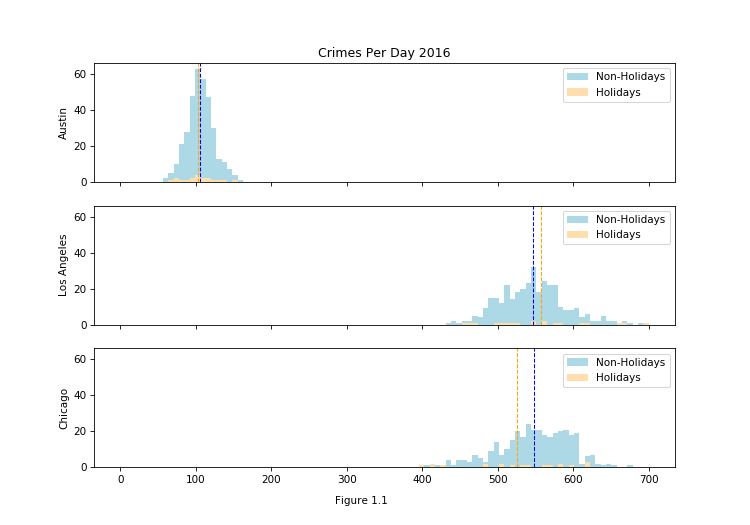

In [54]:
fig, ax= plt.subplots(3, figsize=(10, 7), sharex=True, sharey=True)


bins = np.linspace(0, 700, 100)
plt.yscale('linear')


ax[0].hist(cities_2016_non_holidays_df['Total_Crimes_Austin'], bins, label='Non-Holidays', color='lightblue')
ax[0].hist(cities_2016_holidays_df['Total_Crimes_Austin'], bins, label='Holidays', color='navajowhite')

ax[0].axvline(cities_2016_non_holidays_df['Total_Crimes_Austin'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[0].axvline(cities_2016_holidays_df['Total_Crimes_Austin'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[0].legend()
ax[0].set_ylabel('Austin')

ax[1].hist(cities_2016_non_holidays_df['Total_Crimes_LA'], bins, label='Non-Holidays', color='lightblue')
ax[1].hist(cities_2016_holidays_df['Total_Crimes_LA'], bins, label='Holidays', color='navajowhite')

ax[1].axvline(cities_2016_non_holidays_df['Total_Crimes_LA'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[1].axvline(cities_2016_holidays_df['Total_Crimes_LA'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[1].legend()
ax[1].set_ylabel('Los Angeles')


ax[2].hist(cities_2016_non_holidays_df['Total_Crimes_Chicago'], bins, label='Non-Holidays', color='lightblue')
ax[2].hist(cities_2016_holidays_df['Total_Crimes_Chicago'], bins, label='Holidays', color='navajowhite')

ax[2].axvline(cities_2016_non_holidays_df['Total_Crimes_Chicago'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[2].axvline(cities_2016_holidays_df['Total_Crimes_Chicago'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[2].legend()
ax[2].set_ylabel('Chicago')

ax[0].set_title('Crimes Per Day 2016')

plt.text(0.46,-0.28,'Figure 1.1', horizontalalignment='center', verticalalignment='center', clip_on=False, transform=ax[2].transAxes)
plt.show()

fig.savefig('./Images/histograms_crime_2016.png')

<IPython.core.display.Javascript object>


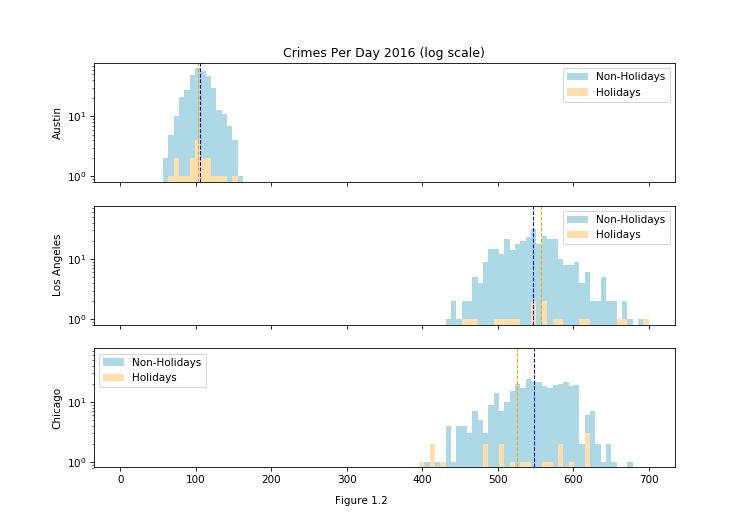

In [55]:
fig, ax= plt.subplots(3, figsize=(10, 7), sharex=True, sharey=True)

bins = np.linspace(0, 700, 100)
plt.yscale('log')


ax[0].hist(cities_2016_non_holidays_df['Total_Crimes_Austin'], bins, label='Non-Holidays', color='lightblue')
ax[0].hist(cities_2016_holidays_df['Total_Crimes_Austin'], bins, label='Holidays', color='navajowhite')

ax[0].axvline(cities_2016_non_holidays_df['Total_Crimes_Austin'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[0].axvline(cities_2016_holidays_df['Total_Crimes_Austin'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[0].legend()
ax[0].set_ylabel('Austin')

ax[1].hist(cities_2016_non_holidays_df['Total_Crimes_LA'], bins, label='Non-Holidays', color='lightblue')
ax[1].hist(cities_2016_holidays_df['Total_Crimes_LA'], bins, label='Holidays', color='navajowhite')

ax[1].axvline(cities_2016_non_holidays_df['Total_Crimes_LA'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[1].axvline(cities_2016_holidays_df['Total_Crimes_LA'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[1].legend()
ax[1].set_ylabel('Los Angeles')


ax[2].hist(cities_2016_non_holidays_df['Total_Crimes_Chicago'], bins, label='Non-Holidays', color='lightblue')
ax[2].hist(cities_2016_holidays_df['Total_Crimes_Chicago'], bins, label='Holidays', color='navajowhite')

ax[2].axvline(cities_2016_non_holidays_df['Total_Crimes_Chicago'].mean(), color='b', linestyle='dashed', linewidth=1)
ax[2].axvline(cities_2016_holidays_df['Total_Crimes_Chicago'].mean(), color='orange', linestyle='dashed', linewidth=1)

ax[2].legend()
ax[2].set_ylabel('Chicago')

ax[0].set_title('Crimes Per Day 2016 (log scale)')

plt.text(0.46,-0.28,'Figure 1.2', horizontalalignment='center', verticalalignment='center', clip_on=False, transform=ax[2].transAxes)
plt.show()

fig.savefig('./Images/histograms_crime_2016_log_scale.png')

<IPython.core.display.Javascript object>


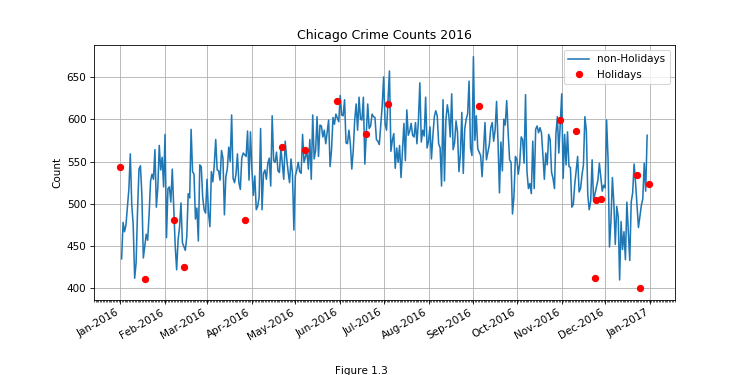

In [56]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

months = mdates.MonthLocator()
days = mdates.DayLocator()


ax.plot(cities_2016_non_holidays_df['timestamp'],
        cities_2016_non_holidays_df['Total_Crimes_Chicago'], label="non-Holidays")

ax.plot(cities_2016_holidays_df['timestamp'],
        cities_2016_holidays_df['Total_Crimes_Chicago'], 'o', c='r', label="Holidays")

date_format = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.legend()
ax.grid()

plt.ylabel('Count')
plt.title('Chicago Crime Counts 2016')

fig.autofmt_xdate()

plt.show()

plt.text(0.46,-0.28,'Figure 1.3', horizontalalignment='center', verticalalignment='center', clip_on=False, transform=ax.transAxes)

fig.savefig('./Images/time_series_chicago_crime_2016.png')

# Question 2

*Do cities with the least amount of crime experience an increase in crime that is more than noticeable during major shopping holidays?*

## Q2. Read in the csv file grouped by date with a count of crime type for each city

In [30]:
austin_total = pd.read_excel('Austin/austin_by_date_2016.xlsx',
                             sheet_name='austin_by_date_2016')
austin_avg = pd.read_excel('Austin/austin_by_date_2016.xlsx',
                           sheet_name='austin_by_date_2016_avg')
austin_holidays = pd.read_excel('Austin/austin_by_date_2016.xlsx',
                                sheet_name='austin_by_date_2016 _holidays')
la_total = pd.read_excel('Los_Angles_city/LA_by_date_2016.xlsx',
                         sheet_name='LA_by_date_2016')
la_avg = pd.read_excel('Los_Angles_city/LA_by_date_2016.xlsx',
                       sheet_name='LA_by_date_2016_avg')
la_holidays = pd.read_excel('Los_Angles_city/LA_by_date_2016.xlsx',
                            sheet_name='LA_by_date_2016_holidays')
chicago_total = pd.read_excel('Chicago_City/chicago_date_group_2016.xlsx',
                              sheet_name='chicago_date_group_2016')
chicago_avg = pd.read_excel('Chicago_City/chicago_date_group_2016.xlsx',
                            sheet_name='chicago_date_group_2016_avg')
chicago_holidays = pd.read_excel('Chicago_City/chicago_date_group_2016.xlsx',
                                 sheet_name='chicago_date_group_2016_holiday')
cities_total = pd.read_excel('cities_by_date_2016.xlsx',
                             sheet_name='combined_cities_2016')
cities_avg = pd.read_excel('cities_by_date_2016.xlsx',
                           sheet_name='combined_cities_2016_avg')
cities_holidays = pd.read_excel('cities_by_date_2016.xlsx',
                                sheet_name='combined_cities_2016_holidays')
cities = pd.read_csv('cities_by_date_2016.csv')

holiday_df = pd.read_csv("retail_holidays.csv")

holiday_2016_df = holiday_df[['Retail Holidays','2016 Year']]

holiday_2016_df

hol_dates = holiday_2016_df['2016 Year']

pheonix = pd.read_csv('pheonix_crimes_by_date.csv')
pheonix_2016 = pheonix[pheonix['Date'].str.contains('2016')]
pheonix_2016.head()

LA_2016_hol = pd.read_csv('LA_2016_holidays.csv')
hol_form_la = LA_2016_hol[:-2]

chicago_2016_hol = pd.read_csv('chicago_2016_holidays.csv')
hol_form_chicago = chicago_2016_hol[:-2]

austin_2016_hol = pd.read_csv('austin_2016_holidays.csv')
hol_form_austin = austin_2016_hol[:-2]

In [32]:
holidays_df = pd.read_csv('retail_holidays.csv')
hol_2016 = holidays_df.drop(['2015 Year','2017 Year','2018 Year'], axis = 1)

holiday_2016 = pheonix_2016.merge(hol_2016, left_on='Date', right_on='2016 Year', how='left')
holiday_2016.drop('2016 Year', axis=1, inplace=True)
hol_2016_pheonix = holiday_2016.dropna(how = 'any')

# Sum Phoenix Holiday Crimes.
motor_hol = hol_2016_pheonix['MOTOR VEHICLE THEFT'].sum()
theft_hol = hol_2016_pheonix['LARCENY-THEFT'].sum()
sex_hol = hol_2016_pheonix['RAPE'].sum()
drug_hol = hol_2016_pheonix['DRUG OFFENSE'].sum()
burglary_hol = hol_2016_pheonix['BURGLARY'].sum() 
assault_hol = hol_2016_pheonix['AGGRAVATED ASSAULT'].sum()
murder_hol = hol_2016_pheonix['MURDER AND NON-NEGLIGENT MANSLAUGHTER'].sum() 
robbery_hol = hol_2016_pheonix['ROBBERY'].sum() 
arson_hol = hol_2016_pheonix['ARSON'].sum() 

# Add all crimes together.
pheonix_hol_crime = (motor_hol + theft_hol + sex_hol + drug_hol + burglary_hol + 
                 assault_hol + murder_hol + robbery_hol + arson_hol)
# Summed crimes for LA, Chicago, and Austin. 
la_hol_crime = hol_form_la['Total Crime Count'].sum()
chicago_hol_crime = hol_form_chicago['Total Crime Count'].sum()
austin_hol_crime = hol_form_austin['Total Crime Count'].sum()

### Q2. Convert to dataframes

In [33]:
# Austin DataFrames
austin_total_df = pd.DataFrame(austin_total)
austin_avg_df = pd.DataFrame(austin_avg)
austin_holidays_df = pd.DataFrame(austin_holidays)

# LA Data Frames
la_total_df = pd.DataFrame(la_total)
la_avg_df = pd.DataFrame(la_avg)
la_holidays_df = pd.DataFrame(la_holidays)

# Chicago Data Frames
chicago_total_df = pd.DataFrame(chicago_total)
chicago_avg_df = pd.DataFrame(chicago_avg)
chicago_holidays_df = pd.DataFrame(chicago_holidays)

# Cities Data Frames
cities_total_df = pd.DataFrame(cities_total)
cities_avg_df = pd.DataFrame(cities_avg)
cities_holidays_df = pd.DataFrame(cities_holidays)

cities_df = pd.DataFrame(cities)

motor_p = pheonix_2016['MOTOR VEHICLE THEFT'].sum()
theft_p = pheonix_2016['LARCENY-THEFT'].sum()
sex_p = pheonix_2016['RAPE'].sum()
drug_p = pheonix_2016['DRUG OFFENSE'].sum()
burglary_p = pheonix_2016['BURGLARY'].sum() 
assault_p = pheonix_2016['AGGRAVATED ASSAULT'].sum()
murder_p = pheonix_2016['MURDER AND NON-NEGLIGENT MANSLAUGHTER'].sum() 
robbery_p = pheonix_2016['ROBBERY'].sum() 
arson_p = pheonix_2016['ARSON'].sum() 
pheonix_total_crime = (motor_p + theft_p + sex_p + drug_p + burglary_p + 
                 assault_p + murder_p + robbery_p + arson_p)

la_pop = 3981000
chicago_pop = 2720000
austin_pop = 938200
phoenix_pop = 1602000

la_crime_total = la_total_df['Total Crime Count'].sum() - la_hol_crime
austin_crime_total = austin_total_df['Total Crime Count'].sum() - austin_hol_crime
chicago_crime_total = chicago_total_df['Total Crime Count'].sum() - chicago_hol_crime

#print(la_crime_total, austin_crime_total, chicago_crime_total)
la_capita = (la_crime_total / la_pop)
chicago_capita = (chicago_crime_total / chicago_pop)
austin_capita = (austin_crime_total / austin_pop)
pheonix_capita = (pheonix_total_crime / phoenix_pop)

print(la_capita, chicago_capita, austin_capita)

capita_df = pd.DataFrame ({'City': ['Los Angeles', 'Austin', 'Chicago', 'Pheonix'],
                          'Population': [la_pop, austin_pop, chicago_pop, phoenix_pop],
                          'Total Crime': [la_crime_total, austin_crime_total, chicago_crime_total, pheonix_total_crime],
                          'Crimes Per Capita x 10': [la_capita.round(2)*100, austin_capita.round(2)*100, 
                           chicago_capita.round(2)*100, pheonix_capita.round(2)*100]})

crime_df = pd.DataFrame ({'City': ['Los Angeles', 'Austin', 'Chicago', 'Pheonix'],
                          'Population': [la_pop, austin_pop, chicago_pop, phoenix_pop],
                          'Total Crime': [la_crime_total, austin_crime_total, chicago_crime_total, pheonix_total_crime],
                          'Crimes Per Capita x 10': [la_capita.round(2)*100, austin_capita.round(2)*100, 
                           chicago_capita.round(2)*100, pheonix_capita.round(2)*100]})

cities_df = pd.DataFrame ({'City': ['Los Angeles', 'Austin', 'Chicago', 'Pheonix'],
                          'Population': [la_pop, austin_pop, chicago_pop, phoenix_pop],
                          'Total Crime': [la_crime_total, austin_crime_total, chicago_crime_total, pheonix_total_crime],
                          'Crimes Per Capita x 100': [la_capita.round(2)*100, austin_capita.round(2)*100, 
                           chicago_capita.round(2)*100, pheonix_capita.round(2)*100]})

cities_df

0.09838909821652851 0.1437029411764706 0.0806277979108932


,City,Population,Total Crime,Crimes Per Capita x 100
0,Los Angeles,3981000,391687.0,10.0
1,Austin,938200,75645.0,8.0
2,Chicago,2720000,390872.0,14.0
3,Pheonix,1602000,44437.0,3.0


<IPython.core.display.Javascript object>


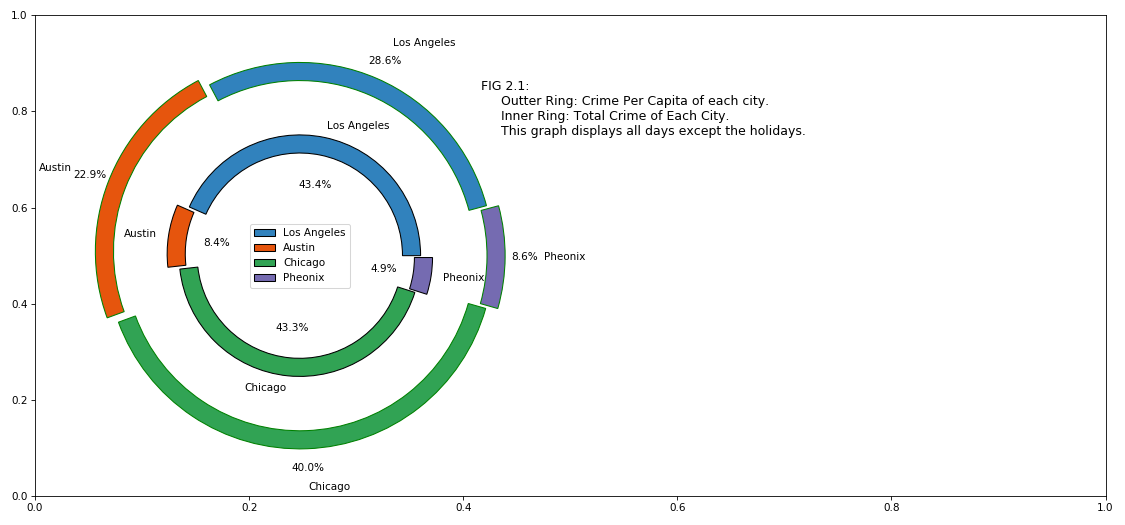

In [35]:
# Build Nested Donut for Crime per Capita Compared to Total Crime. 
# Does not display crime for holidays.
fig, ax = plt.subplots(figsize = (15,7))
ax = fig.add_subplot(323)
explode = (0, 0.2, 0, 0.2)
size = 0.3
per_capita = np.array(capita_df['Crimes Per Capita x 10'])
total_crime = np.array(capita_df['Total Crime'])
capita_cities = capita_df['City']
crime_cities = crime_df['City']
legend_cities = cities_df['City']

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(np.arange(4)*4)

# Inner ring.
ax.pie(total_crime, explode = explode, labels = crime_cities, radius=2.3-size, 
       autopct='%1.1f%%', colors=inner_colors, startangle = 360,
       wedgeprops=dict(width=size, edgecolor='black'))

# Add legend and set aspect for donuts. 
plt.legend(loc='center')
ax.set(aspect="equal")

# Outer ring.
ax.pie(per_capita, explode = explode, labels =capita_cities, radius=3.2, autopct='%1.1f%%', 
       pctdistance=1.1, labeldistance=1.2, colors=outer_colors, startangle = 15,
       wedgeprops=dict(width=size, edgecolor='g'))

# Add text for figure name and pie chart details.
plt.text(3, 2, s ='FIG 2.1:\n     Outter Ring: Crime Per Capita of each city. \n     Inner Ring: Total Crime of Each City.\n     This graph displays all days except the holidays.', fontsize = 12)

# Set layout and save figure. 
plt.tight_layout()
plt.savefig('./Images/reg_year_nexted_pie.png', dpi = 100)

# Show figure. 
plt.show()

## Q2. Analysis

To measure the rate of crime in each city we calculated the crime per capita of each city and then also compared it to the total crime in each city. Comparing the data in FIG 2.1 shows us that the frequency of crime in the year 2016, per the sample set, is not necessarily correlated to the amount of crime, and population size in the given cities.

In [36]:
# Determine holiday crime per capita for holidays only.
la_hol_capita = la_hol_crime / la_pop
austin_hol_capita = austin_hol_crime / austin_pop
chicago_hol_capita = chicago_hol_crime / chicago_pop
pheonix_hol_capita = pheonix_hol_crime / phoenix_pop

# Holidays crimes per capita data frame.
holidays_df = pd.DataFrame ({'City': ['Los Angeles', 'Austin', 'Chicago', 'Pheonix'],
                          'Population': [la_pop, austin_pop, chicago_pop, phoenix_pop],
                          'Total Crime': [la_hol_crime, austin_hol_crime, chicago_hol_crime, pheonix_hol_crime],
                          'Crimes Per Capita x 1000': [la_hol_capita*1000, austin_hol_capita*1000, 
                           chicago_hol_capita*1000, pheonix_hol_capita*1000]})

holidays_df

,City,Population,Total Crime,Crimes Per Capita x 1000
0,Los Angeles,3981000,10767.0,2.704597
1,Austin,938200,1971.0,2.100831
2,Chicago,2720000,9976.0,3.667647
3,Pheonix,1602000,986.0,0.615481


From the above Data Frame we can see that Phoenix and Austin both had lower crime per capita rates through out the entire year, excluding the holiday dates set that were sampled. Because of the population size from this data we can neither prove or deny a correlation in overall crime, population, and the crime per capita. 

<IPython.core.display.Javascript object>


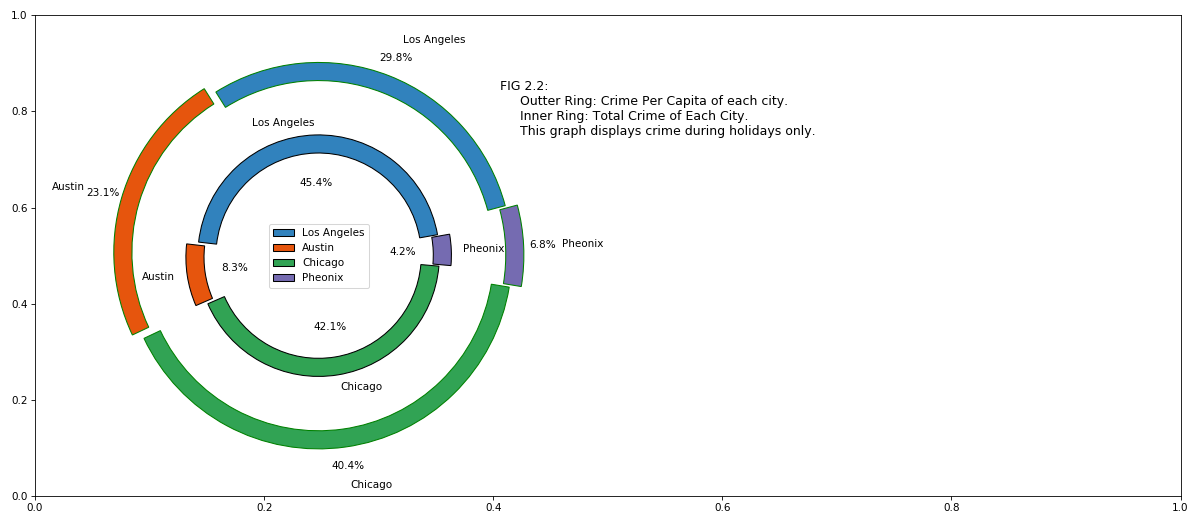

In [38]:
# Build nested donut for crime per capita compared to total crime. 
# Does not display crime for the rest of the year. Only the sampled holidays. 

# Plot variable and sub plot declartion. Set size of plot. 
fig, ax = plt.subplots(figsize = (16,7))
ax = fig.add_subplot(323)

# Set variabes for donuts. 
explode = (0, 0.2, 0, 0.2)
size = 0.3
hol_capita = np.array(holidays_df['Crimes Per Capita x 1000'])
hol_crime = np.array(holidays_df['Total Crime'])
hol_cities = holidays_df['City']
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(np.arange(4)*4)

# Inner ring.
ax.pie(hol_crime, explode = explode, labels = hol_cities, radius=2.3-size, 
       autopct='%1.1f%%', colors=inner_colors, startangle = 370,
       wedgeprops=dict(width=size, edgecolor='black'))

# Add legend and set aspect. 
plt.legend(loc='center')
ax.set(aspect="equal")

# Outer ring.
ax.pie(hol_capita, explode = explode, labels =hol_cities, radius=3.2, autopct='%1.1f%%', 
       pctdistance=1.1, labeldistance=1.2, colors=outer_colors, startangle = 15,
       wedgeprops=dict(width=size, edgecolor='g'))

# Add text for figure name and pie chart details.
plt.text(3, 2, s ='FIG 2.2:\n     Outter Ring: Crime Per Capita of each city. \n     Inner Ring: Total Crime of Each City.\n     This graph displays crime during holidays only.', fontsize = 12)

# Set layout and save figure. 
plt.tight_layout()
plt.savefig('./Images/hol_year_nexted_pie.png', dpi = 100)

# Show figure. 
plt.show()

In the above figure, FIG 2, we can see what the crime per capita (CpC) and total crime percentages were for just the 19 sampled holidays. Comparing Fig 2 to Fig 1 you can see that was a minor increase in crime per capita in Austin but a decrease in phoenix.

|Non-Holiday Crime Per Capita|Holiday Crime Per Capita|
|-----|------|
|Phoenix CPC 2016: 8.6% | Phoenix Holiday CPC 2016: 6.8%|
|Austin CPC 2016: 22.9% | Austin Holiday CPC 2016: 23.1%|

Per this data set we are not able to observe any large increase in crime during the holidays in lower CpC cities. 

# Question 3
*Which major shopping holiday has the most occurrence of crime?*

In [43]:
# Make sure all the dataframes are with same data types.
austin_holidays_df["AGGRAVATED ASSAULT"] = austin_holidays_df["AGGRAVATED ASSAULT"].astype(
    'float')
la_holidays_df["DRUG OFFENSE"] = la_holidays_df["DRUG OFFENSE"].astype('float')
chicago_holidays_df["RAPE"] = chicago_holidays_df["RAPE"].astype('float')

In [44]:
# Delete the last 2 rows of the dataframes.
austin_crime = austin_holidays_df[:-2]
la_crime = la_holidays_df[:-2]
chicago_crime = chicago_holidays_df[:-2]

In [49]:
# Rearrange the dataframe for the plot
austin_holidays_crime_df = austin_crime[['Date', 'Holiday', 'BURGLARY', 'THEFT',
                                         'AGGRAVATED ASSAULT', ' RAPE', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'DRUG OFFENSE', 'FRAUD']]
la_holidays_crime_df = la_crime[['Date', 'Holiday', 'BURGLARY', 'THEFT', 'AGGRAVATED ASSAULT',
                                 'RAPE', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'DRUG OFFENSE', 'FRAUD']]
chicago_holidays_crime_df = chicago_crime[['Date', 'Holiday ', 'BURGLARY', 'THEFT',
                                           'AGGRIVATED ASSAULT', 'RAPE', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'DRUG OFFENSE', 'FRAUD']]

chicago_holidays_crime_df.head()

,Date,Holiday,BURGLARY,THEFT,AGGRIVATED ASSAULT,RAPE,MURDER AND NON-NEGLIGENT MANSLAUGHTER,DRUG OFFENSE,FRAUD
0,2016-01-01 00:00:00,New Years Day,33.0,62.0,195.0,17.0,3.0,21.0,50.0
1,2016-01-18 00:00:00,Martin Luther King Day,43.0,61.0,101.0,2.0,0.0,33.0,29.0
2,2016-02-07 00:00:00,Super Bowl,35.0,88.0,134.0,6.0,1.0,27.0,18.0
3,2016-02-14 00:00:00,Valentine's Day,44.0,63.0,132.0,6.0,3.0,28.0,18.0
4,2016-03-27 00:00:00,Easter,48.0,74.0,158.0,7.0,0.0,31.0,15.0


## Q3. Function Name: bar_all_city
* Description: Plot the stack bar chart for 3 cities
* Arguments: 3 types of arguments for the y axis, x axis and the label for x axis

In [46]:
def bar_all_city(Total_crime1, Total_crime2, Total_crime3, x_axis, x_ticks):
    fig = plt.figure(figsize=(18, 8))

    city_name = ['Austin', 'Los Angles', 'Chicago']
    width = .60
    # Draw the bar plot for the 3 cities. Assign the color of the plot to one of the flag colors of that city
    plt.bar(x_axis, Total_crime1, color='red',
            width=width, edgecolor='black', align='center')
    plt.bar(x_axis, Total_crime2, color='green',
            bottom=Total_crime1, width=width, edgecolor='black', align='center')
    plt.bar(x_axis, Total_crime3, color='skyblue',
            bottom=Total_crime2, width=width, edgecolor='black', align='center')

    # Create the ticks for our bar chart's x axis
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, x_ticks, rotation=65,
               fontsize=10, horizontalalignment="right")
    plt.legend(city_name, loc='upper right',
               edgecolor='black', title='City Names')

## Q3. Use the data from 3 cities: Austin, Los Angeles and Chicago
    
* Chart 1: Stacked bar chart using total crime count and major shopping holiday.
* Analysis 1: We can determine which major shopping holiday has the most occurrence of crime.

<IPython.core.display.Javascript object>


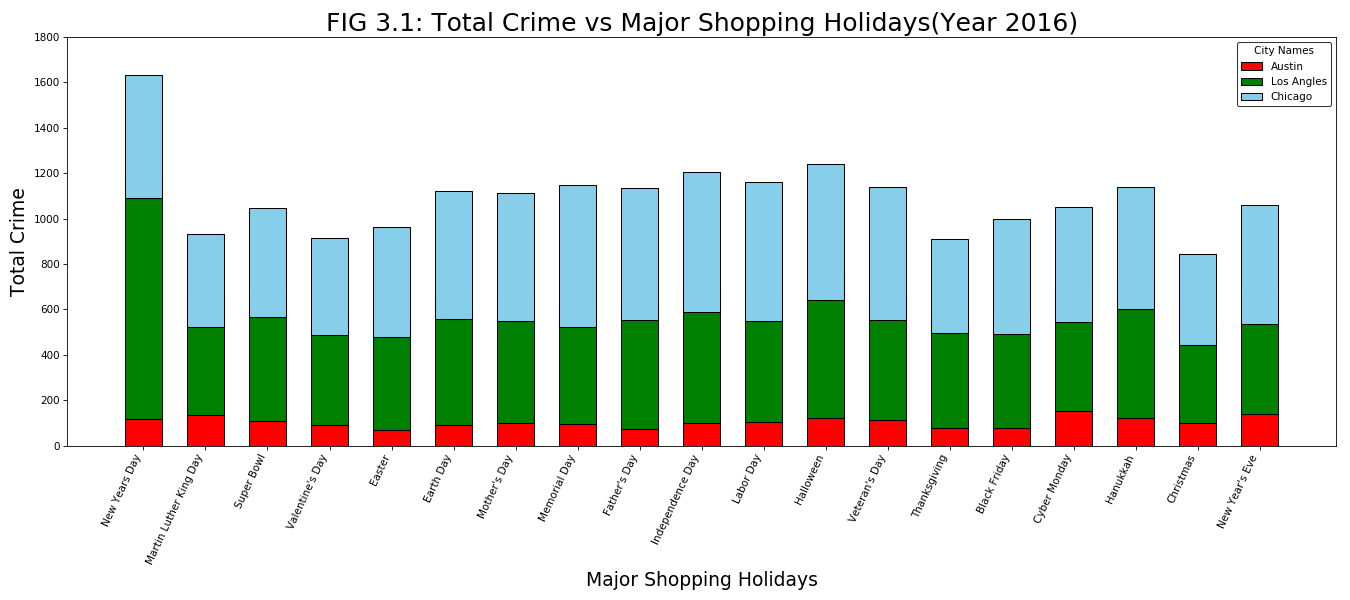

In [47]:
# Read the total crimes for each city
tot_crime1 = austin_crime['Total Crime Count']
tot_crime2 = la_crime['Total Crime Count']
tot_crime3 = chicago_crime['Total Crime Count']
# Assign x-axis
holiday_list = austin_crime["Holiday"]
x_range = range(len(holiday_list))
# Call the function
bar_all_city(tot_crime1, tot_crime2, tot_crime3, x_range, holiday_list)
# Set Y limits of the plot
plt.ylim([0, 1800])
# Set all the labels and title of the plot
plt.ylabel('Total Crime', fontsize=18)
plt.xlabel('Major Shopping Holidays', fontsize=18)
plt.title('FIG 3.1: Total Crime vs Major Shopping Holidays(Year 2016)', fontsize=24)
plt.tight_layout()
# Save and display the chart
plt.savefig("Images/Total_crime_holidays.png")
plt.show()

## Q3. Observations

We consider crime data from 3 cities for the 18 major holiday shopping days for the year 2016. By observing the Total crime vs Shopping holiday stacked bar chart (FIG 3:1), we can conclude that most of the crimes occurred on New Year’s Day as compared to Christmas, Thanksgiving Day, or any other holiday. This could be due to Christmas being a religious holiday or Thanksgiving Day being a time where most families stay home Holidays such as Martin Luther King Day or Valentine’s Day have a considerably lower crime rate because they are relatively minor holidays compared to other holidays such as Labor Day, Independence Day, or New Year’s where many shops are still open.

If we observe individual cities, in Los Angeles, the maximum occurrences of crime occurred on New Year day as compared to all other major holidays. If we observe the data from Chicago, more crimes occurred on most holidays as compared to the other cities. Austin, in general, has significantly less occurrences of crime on every single holiday compared to the other cities, which may be due to the considerably lower population in Austin as compared to other cities. 

## Q3. Use the data from 3 cities: Austin, Los Angeles and Chicago
* Chart 2: Stacked bar chart 1: Holiday crime with crime type on x-axis vs crime count for each individual crime type.¶
* Analysis 2: We can determine which crimes are most prevalent during each major shopping holidays


<IPython.core.display.Javascript object>


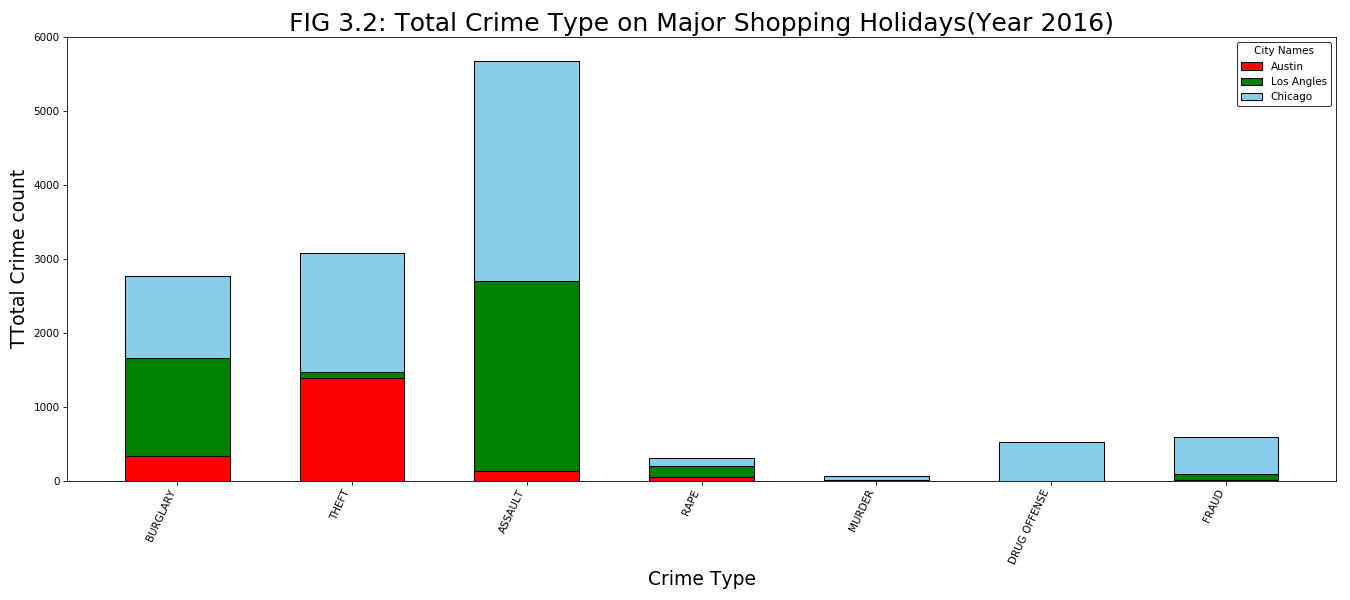

In [48]:
# Read the total crime types and the count for each city
tot_crime_type1 = austin_holidays_df.iloc[19, [2, 3, 4, 5, 6, 8, 9]]
tot_crime_type2 = la_holidays_df.iloc[19, [2, 3, 4, 5, 6, 8, 9]]
tot_crime_type3 = chicago_holidays_df.iloc[19, [2, 3, 4, 5, 6, 8, 9]]
# Assign x-axis
crime_list = ['BURGLARY', 'THEFT', 'ASSAULT',
              'RAPE', 'MURDER', 'DRUG OFFENSE', 'FRAUD']
x_range = range(len(crime_list))
# Call the function
bar_all_city(tot_crime_type1, tot_crime_type2,
             tot_crime_type3, x_range, crime_list)
# Set Y limits of the plot
plt.ylim([0, 6000])
# Set all the labels and title of the plot
plt.ylabel('TTotal Crime count', fontsize=18)
plt.xlabel('Crime Type', fontsize=18)
plt.title('FIG 3.2: Total Crime Type on Major Shopping Holidays(Year 2016)', fontsize=24)
plt.tight_layout()
# Save and display the chart
plt.savefig("Images/Total_crime_type_holidays.png")
plt.show()

## Q3. Observation 2

By observing the total individual crime type stacked plot (FIG 3:2) on the same 3 cities during shopping holidays only, we can conclude that the most common type of crime is assault followed by theft. Assault’s prevalence is almost double that of the other crimes. If we compare the cities, we find that Chicago and LA follow the same trend with the prevalence of assault being the highest compared to other crimes however, in Austin, the most common crime type is theft instead of assault. This may be because Austin has a significantly lower population than the other cities, which results in assault being less likely compared to theft from stores or other institutions. Los Angeles has a significantly smaller theft rate as compared to other cities, which could be because Los Angeles is in California, which has the greatest economy out of all the states in the USA, which results in more money being able to go towards better security at homes, stores, and institutions, preventing theft. On the other hand, this cannot prevent burglary or assault as easily, which explains the significantly higher rates of burglary and assault in Los Angeles as compared to other crimes.

## Question 4

*Do the holidays have an impact on crime location?*

### Q4. Use the data from 2 cities: Chicago and New York City
* Chart 1: Bar chart using crime count by location description during major shopping holiday.
* Chart 2: Bar chart using crime count by location description during non-major shopping holiday.
* Analysis 1: We can determine which location type has the most occurrence of crime.

...code and figures go here...

## Q4. Observation 1
We consider crime data from New York City major shopping days and non-major shopping holidays for the year 2016 because New York City has full location by date crime reporting. Additionally, New York City has a large population size which is helpful for sampling. By observing the Crime by Location bar charts, we can conclude that most of the crimes occurred at a residence during both major shopping holidays and non-major shopping holidays. We do not observe a holiday impact on crime location. 

### Conclusion
* Based on the data in this study, crime does/does not seem to increase during major shopping holidays
* Based on the data in this study, crime1,crime2, crime3, seem to be more prevelant during major shopping holidays
* Based on the data in this study, cityn, citym, cityk, seem to be more prone to an increase in crime during major shopping holidays
* Based on the data in the study, cities with the least amount of crime do/do not seem to experience an increase in crime that's more noticeable during major shopping holidays

### A step further
* limitations of the study: time constraints, lack of crime expertise, reliability of data
* biases of the study
* improvements: how study can be improved
* Major takeways